In [1]:
# import the required packages
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## 1. HR Analytics

### 1.1 Load and Sample the data

In [2]:
# Load data
hr_df = pd.read_csv('hr_data_new.csv')

In [3]:
# Display first five rows of hr_df
hr_df.head()

,Unnamed: 0,education,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,department_Sales & Marketing,department_Technology,department_Procurement,...,KPIs_met >80%^2 awards_won?,KPIs_met >80%^2 avg_training_score,KPIs_met >80% awards_won?^2,KPIs_met >80% awards_won? avg_training_score,KPIs_met >80% avg_training_score^2,awards_won?^3,awards_won?^2 avg_training_score,awards_won? avg_training_score^2,avg_training_score^3,is_promoted
0,0,1,-0.416242,-1.566648,0,0,-1.315349,1,0,0,...,0.0,-0.000000,0.0,-0.0,0.000000,0.0,-0.000000,0.000000,-2.275742,0
1,1,2,-0.416242,1.090434,0,0,-1.315349,1,0,0,...,0.0,-0.000000,0.0,-0.0,0.000000,0.0,-0.000000,0.000000,-2.275742,0
2,2,1,-0.416242,0.426163,0,0,0.688229,0,1,0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.325986,0
3,3,2,-0.416242,-0.238107,1,0,-0.140838,0,0,1,...,0.0,-0.140838,0.0,-0.0,0.019835,0.0,-0.000000,0.000000,-0.002794,1
4,4,1,3.071462,-0.238107,0,1,1.517296,0,0,0,...,0.0,0.000000,0.0,0.0,0.000000,1.0,1.517296,2.302187,3.493100,1


In [4]:
# Info of hr_df
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 46 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Unnamed: 0                                             9092 non-null   int64  
 1   education                                              9092 non-null   int64  
 2   no_of_trainings                                        9092 non-null   float64
 3   previous_year_rating                                   9092 non-null   float64
 4   KPIs_met >80%                                          9092 non-null   int64  
 5   awards_won?                                            9092 non-null   int64  
 6   avg_training_score                                     9092 non-null   float64
 7   department_Sales & Marketing                           9092 non-null   int64  
 8   department_Technology                           

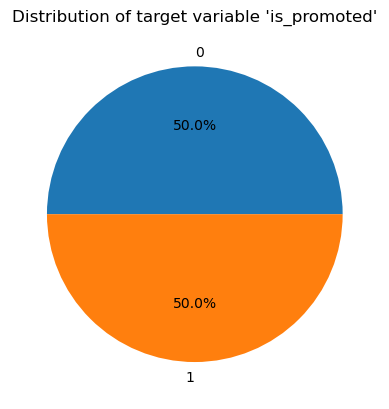

In [5]:
# Univariate analysis of target variable -- is_promoted
values = hr_df['is_promoted'].value_counts()
labels = values.index

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of target variable 'is_promoted'")
plt.show()

In [6]:
# Split into train and test
hr_df_x = hr_df.copy()
hr_df_x.drop(['Unnamed: 0', 'is_promoted'], axis=1, inplace = True)
hr_df_y = hr_df['is_promoted']
x_train, x_test, y_train, y_test = hr_df_x.iloc[:7274, :], hr_df_x.iloc[7274:, :], hr_df_y[:7274], hr_df_y[7274:]

### 1.2 Build the Model(s)

In [7]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [8]:
# XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [9]:
# AdaBoost Classifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train,y_train)

AdaBoostClassifier(random_state=42)

### 1.3 Evaluate the Model(s)

In [10]:
def evaluate_model(model, X, Y, x, y):
    # Evaluation metrics
    print('training accuracy is: ', model.score(X,Y))
    print('testing accuracy is: ', model.score(x,y))
    
    # Confusion matrix
    y_pred = model.predict(x)

    # Compute the confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Visualize the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(2) # Adjust this based on the number of classes
    plt.xticks(tick_marks, ['Class 0', 'Class 1'])
    plt.yticks(tick_marks, ['Class 0', 'Class 1'])

    # Display the counts in each cell with appropriate colors
    for i in range(2):
        for j in range(2):
            color = 'white' if i == j and cm[i][j] != 0 else 'black'  # Set color to white if True Positive and non-zero
            plt.text(j, i, str(cm[i][j]), color=color, ha='center', va='center')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

>#### 1.3.1 Random Forest Classifier
>- High training accuracy -> low bias
>- Large difference between training and test accuracy (~0.12) -> high variance
>- Overfitted
>- High number of false negatives and false positives -> false positives almost 1/3 of true positives

training accuracy is:  0.9026670332691779
testing accuracy is:  0.7816281628162817


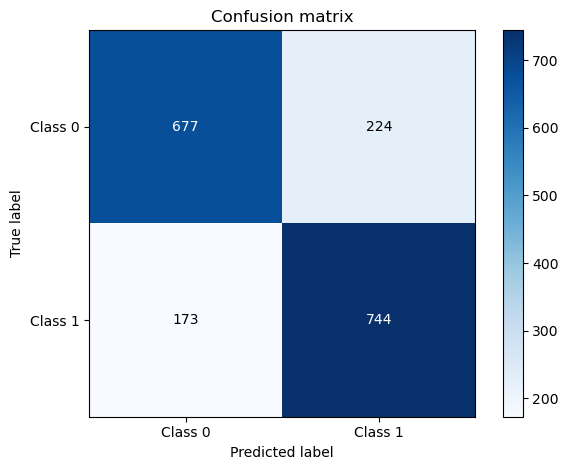

In [11]:
# Random Forest Classifier
evaluate_model(rf, x_train, y_train, x_test, y_test)

>#### 1.3.2 XGBoost Classifier
>- High training accuracy -> low bias
>- Large difference between training and test accuracy, but not as large as Random Forest (~0.06) -> high variance
>- Overfitted
>- Lower number of false negatives as compared to Random Forest

training accuracy is:  0.8634863898817707
testing accuracy is:  0.8096809680968097


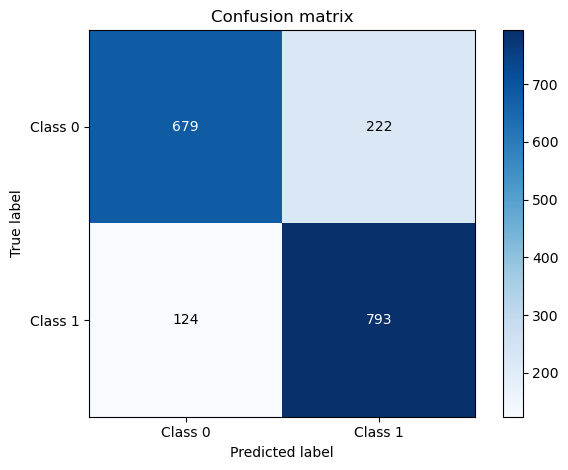

In [12]:
# XGBoost Classifier
evaluate_model(xgb, x_train, y_train, x_test, y_test)

>#### 1.3.3 AdaBoost Classifier
>- Relatively high training accuracy -> low bias
>- Lower training accuracy than Random Forest and XGBoost
>- Small difference between training and test accuracy (~0.02) -> low variance
>- Underfitted

training accuracy is:  0.7789386857299972
testing accuracy is:  0.7931793179317932


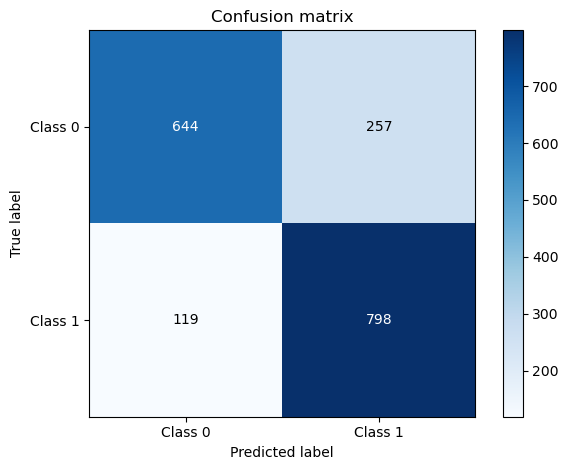

In [13]:
# AdaBoost Classifier
evaluate_model(ab, x_train, y_train, x_test, y_test)

### 1.4 Improve the Model(s)
>#### 1.4.1 Random Forest Classifier
>>##### 1.4.1.1 GridSearch
Parameters focused on for tuning:
>>- n_estimators
>>- max_depth
>>- min_samples_split
>>- min_samples_leaf
>>- max_features

In [15]:
# GridSearch for Random Forest Classifier
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in Random Forest
    'max_depth': [10, 20, 30],    # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required at each leaf node
    'max_features': [0.2, 0.5, 0.8]     # Number of features to consider at each split
}

# Create an instance of Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
rf_gs.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", rf_gs.best_params_)
print("Highest accuracy found: ", rf_gs.best_score_)

# Get the best model
best_rf = rf_gs.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy)

Best parameters found:  {'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Highest accuracy found:  0.8057465363944469
Test accuracy:  0.8234323432343235


>>##### 1.4.1.2 Parameter Tuning for 'max_depth'

In [20]:
def plot_param(param, param_range, train_mse, test_mse):
    
    # Plot the simple split measures (train_mse & test_mse) 
    plt.plot(param_range, train_mse, 'bo-', label ='training mse')
    plt.plot(param_range, test_mse, 'ro-', label = 'testing mse')

    plt.xlabel(param, fontsize='x-large')
    plt.ylabel('mean squared error (MSE)', fontsize='x-large')

    plt.legend(loc='best', shadow=True, fontsize='x-large')
    plt.show()

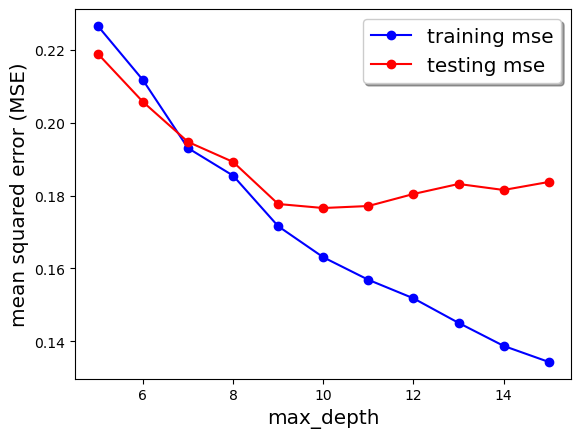

In [16]:
# Parameter tuning - max_depth
max_depth_range = range(5, 16)

md_rf_train_mse = []
md_rf_test_mse = []

for m in max_depth_range:
    # Create Random Forest Classifier Model
    rf = RandomForestClassifier(max_depth=m,random_state=42, n_estimators=200, max_features=0.8, 
                                min_samples_leaf=1, min_samples_split=10)
    rf.fit(x_train, y_train) 
    md_rf_train_mse.append(mean_squared_error(rf.predict(x_train), y_train))
    md_rf_test_mse.append(mean_squared_error(rf.predict(x_test), y_test))
    
plot_param('max_depth', max_depth_range, md_rf_train_mse, md_rf_test_mse)

>>##### 1.4.1.3 Parameter Tuning for 'n_estimators'

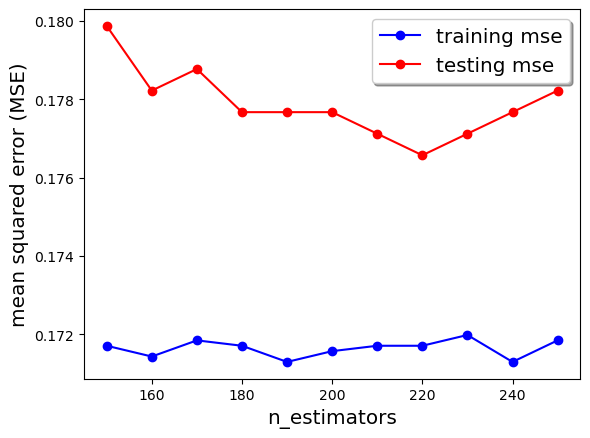

In [17]:
# Parameter tuning - n_estimators
n_estimators_range = range(150, 260, 10)

e_rf_train_mse = []
e_rf_test_mse = []

for e in n_estimators_range:
    # Create Random Forest Classifier Model
    rf = RandomForestClassifier(max_depth=9,random_state=42, n_estimators=e, max_features=0.8, 
                                min_samples_leaf=1, min_samples_split=10)
    rf.fit(x_train, y_train) 
    e_rf_train_mse.append(mean_squared_error(rf.predict(x_train), y_train))
    e_rf_test_mse.append(mean_squared_error(rf.predict(x_test), y_test))
    
plot_param('n_estimators', n_estimators_range, e_rf_train_mse, e_rf_test_mse)

>>##### 1.4.1.4 Parameter Tuning for 'max_features'

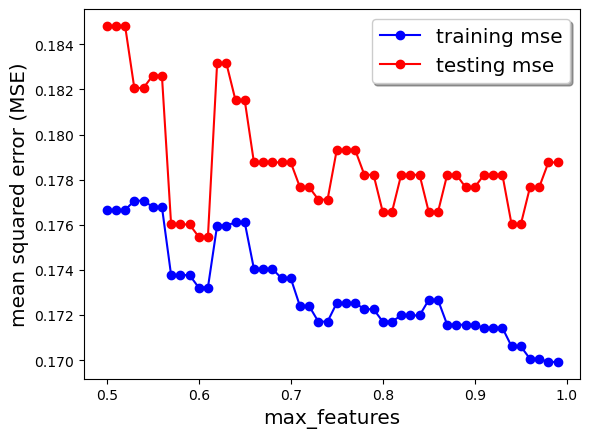

In [21]:
# Parameter tuning - max_features
max_features_range = np.arange(0.5, 1, 0.01)

mf_rf_train_mse = []
mf_rf_test_mse = []

for m in max_features_range:
    # Create Random Forest Classifier Model
    rf = RandomForestClassifier(max_depth=9,random_state=42, n_estimators=220, max_features=m, 
                                min_samples_leaf=1, min_samples_split=10)
    rf.fit(x_train, y_train) 
    mf_rf_train_mse.append(mean_squared_error(rf.predict(x_train), y_train))
    mf_rf_test_mse.append(mean_squared_error(rf.predict(x_test), y_test))
    
plot_param('max_features', max_features_range, mf_rf_train_mse, mf_rf_test_mse)

>>##### 1.4.1.5 Parameter Tuning for 'min_samples_split'

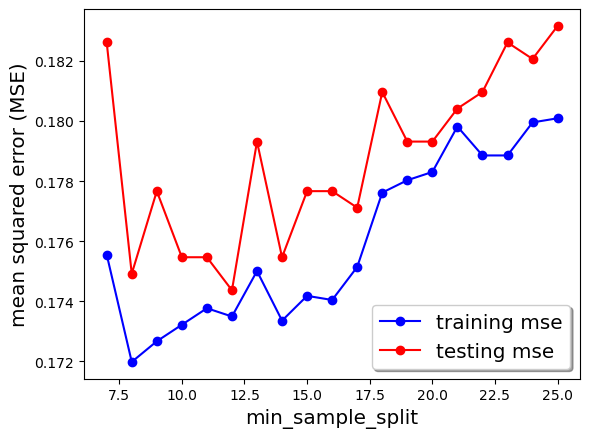

In [23]:
# Parameter tuning - min_samples_split
min_samp_split_range = range(7,26)

mss_rf_train_mse = []
mss_rf_test_mse = []

for m in min_samp_split_range:
    # Create Random Forest Classifier Model
    rf = RandomForestClassifier(max_depth=9,random_state=42, n_estimators=220, max_features=0.61, 
                                min_samples_leaf=1, min_samples_split=m)
    rf.fit(x_train, y_train) 
    mss_rf_train_mse.append(mean_squared_error(rf.predict(x_train), y_train))
    mss_rf_test_mse.append(mean_squared_error(rf.predict(x_test), y_test))
    
plot_param('min_sample_split', min_samp_split_range, mss_rf_train_mse, mss_rf_test_mse)

>>##### 1.4.1.6 Final Random Forest Classifier Model

training accuracy is:  0.8280175969205389
testing accuracy is:  0.8250825082508251


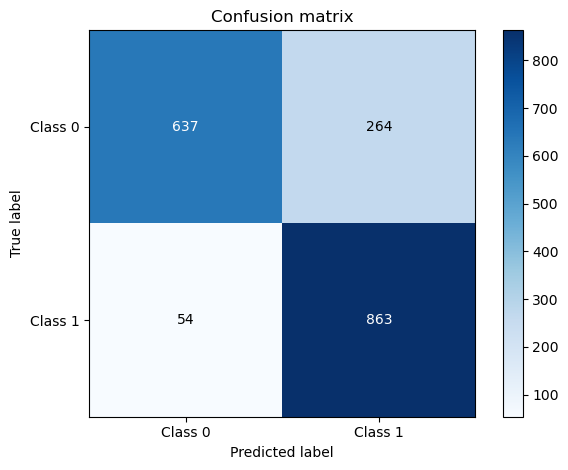

In [26]:
# Final Random Forest Classifier model
rf_new = RandomForestClassifier(max_depth=9,random_state=42, n_estimators=220, max_features=0.61, 
                                min_samples_leaf=1, min_samples_split=8)
rf_new.fit(x_train,y_train)
evaluate_model(rf_new, x_train, y_train, x_test, y_test)

>#### 1.4.2 XGBoost Classifier
>>##### 1.4.2.1 GridSearch & Regularization
>>Parameters tuned for XGBoost Classifier:
>>- n_estimators
>>- learning_rate
>>- max_depth
>>- alpha (regularization parameter)
>>- lambda (regularization parameter)

In [21]:
# GridSearch for XGBoost Classifier + Regularization
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'alpha': [0.1, 0.01, 0.001],
    'lambda': [0.1, 0.01, 0.001]
}

# Create an instance of the XGBClassifier
xgb = XGBClassifier(random_state = 42)

# Instantiate GridSearchCV
xgb_gs = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
xgb_gs.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", xgb_gs.best_params_)
print("Highest accuracy found: ", xgb_gs.best_score_)

# Get the best model
best_xgb = xgb_gs.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy)

Best parameters found:  {'alpha': 0.001, 'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Highest accuracy found:  0.811656433018052
Test accuracy:  0.8217821782178217


>>##### 1.4.2.2 Parameter Tuning for 'learning_rate'

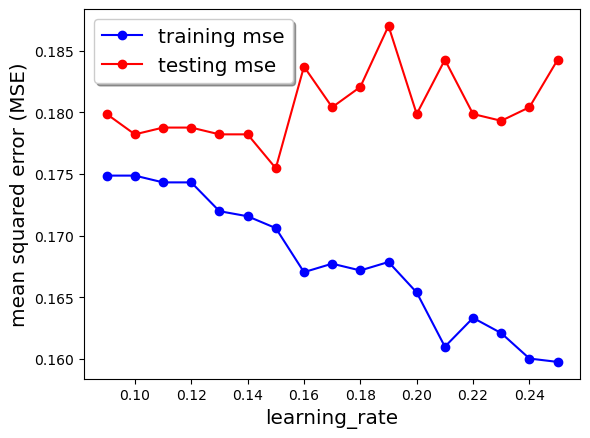

In [22]:
# Parameter tuning - learning_rate
learning_rate_range = np.arange(0.09, 0.26, 0.01)

lr_xgb_train_mse = []
lr_xgb_test_mse = []

for l in learning_rate_range:
    # Create XGBoost Classifier Model
    xgb = XGBClassifier(learning_rate=l,random_state=42, n_estimators=200, max_depth=3,reg_lambda=0.1, reg_alpha=0.001)
    xgb.fit(x_train, y_train) 
    lr_xgb_train_mse.append(mean_squared_error(xgb.predict(x_train), y_train))
    lr_xgb_test_mse.append(mean_squared_error(xgb.predict(x_test), y_test))
    
plot_param('learning_rate', learning_rate_range, lr_xgb_train_mse, lr_xgb_test_mse)

>>##### 1.4.2.3 Parameter Tuning for 'n_estimators'

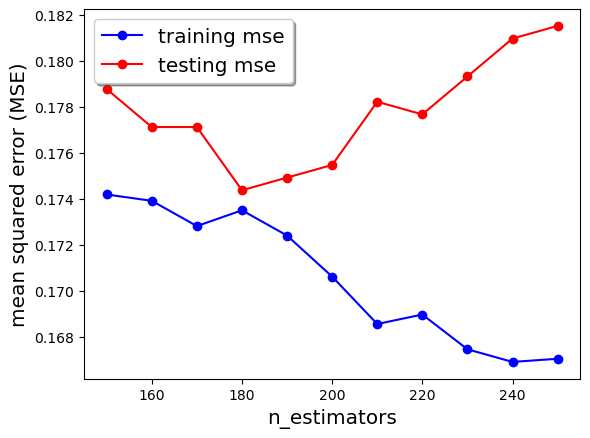

In [23]:
# Parameter tuning - n_estimators
estimators_range = range(150, 260, 10)

ne_xgb_train_mse = []
ne_xgb_test_mse = []

for e in estimators_range:
    # Create XGBoost Classifier Model
    xgb = XGBClassifier(learning_rate=0.15,random_state=42, n_estimators=e, max_depth=3,reg_lambda=0.1, reg_alpha=0.001)
    xgb.fit(x_train, y_train) 
    ne_xgb_train_mse.append(mean_squared_error(xgb.predict(x_train), y_train))
    ne_xgb_test_mse.append(mean_squared_error(xgb.predict(x_test), y_test))
    
plot_param('n_estimators', estimators_range, ne_xgb_train_mse, ne_xgb_test_mse)

>>##### 1.4.2.4 Parameter Tuning for 'alpha'

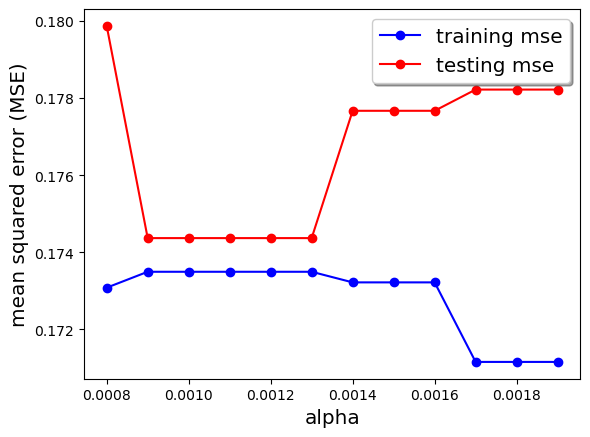

In [24]:
# Parameter tuning - alpha
alpha_range = np.arange(0.0008, 0.002, 0.0001)

a_xgb_train_mse = []
a_xgb_test_mse = []

for a in alpha_range:
    # Create XGBoost Classifier Model
    xgb = XGBClassifier(learning_rate=0.15,random_state=42, n_estimators=180, max_depth=3,reg_lambda=0.1, reg_alpha=a)
    xgb.fit(x_train, y_train) 
    a_xgb_train_mse.append(mean_squared_error(xgb.predict(x_train), y_train))
    a_xgb_test_mse.append(mean_squared_error(xgb.predict(x_test), y_test))
    
plot_param('alpha', alpha_range, a_xgb_train_mse, a_xgb_test_mse)

>>##### 1.4.2.5 Parameter Tuning for 'lambda'

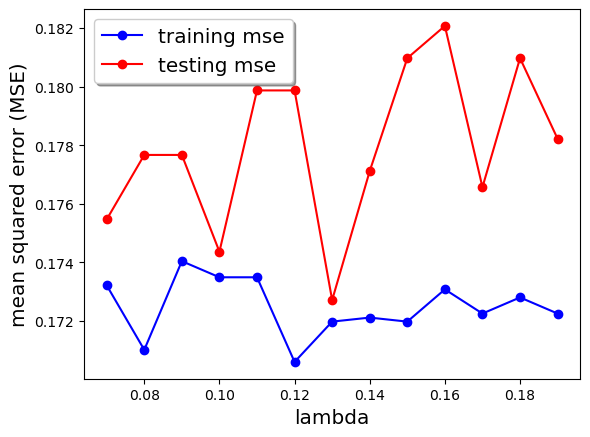

In [25]:
# Parameter tuning - lambda
lambda_range = np.arange(0.07, 0.2, 0.01)

l_xgb_train_mse = []
l_xgb_test_mse = []

for l in lambda_range:
    # Create XGBoost Classifier Model
    xgb = XGBClassifier(learning_rate=0.15,random_state=42, n_estimators=180, max_depth=3,reg_lambda=l, reg_alpha=0.001)
    xgb.fit(x_train, y_train) 
    l_xgb_train_mse.append(mean_squared_error(xgb.predict(x_train), y_train))
    l_xgb_test_mse.append(mean_squared_error(xgb.predict(x_test), y_test))
    
plot_param('lambda', lambda_range, l_xgb_train_mse, l_xgb_test_mse)

>>##### 1.4.2.6 Final XGBoost Classifier Model

training accuracy is:  0.8280175969205389
testing accuracy is:  0.8272827282728272


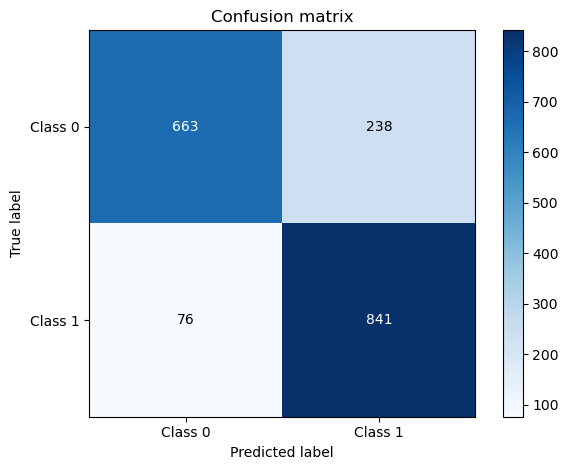

In [29]:
# Final XGB model after tuning
xgb_new = XGBClassifier(learning_rate=0.15,random_state=42, n_estimators=180, max_depth=3,reg_lambda=0.13, reg_alpha=0.001)
xgb_new.fit(x_train,y_train)
evaluate_model(xgb_new, x_train, y_train, x_test, y_test)

>#### 1.4.3 AdaBoost Classifier
>>##### 1.4.3.1 GridSearch
>>Parameters tuned in AdaBoost:
>>- n_estimators
>>- learning_rate

In [27]:
# Gridsearch for AdaBoost Classifier
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (decision trees)
    'learning_rate': [0.1, 0.5, 1.0], # Learning rate shrinks the contribution of each weak learner
}

# Create an instance of the AdaBoost Classifier
ab = AdaBoostClassifier(random_state=42)

# Instantiate GridSearchCV
ab_gs = GridSearchCV(estimator=ab, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
ab_gs.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", ab_gs.best_params_)
print("Highest accuracy found: ", ab_gs.best_score_)

# Get the best model
best_ab = ab_gs.best_estimator_

# Evaluate the best model on the test set
y_pred = best_ab.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy)

Best parameters found:  {'learning_rate': 1.0, 'n_estimators': 200}
Highest accuracy found:  0.7926849028866926
Test accuracy:  0.7948294829482948


>>##### 1.4.3.2 Parameter Tuning for 'learning_rate'

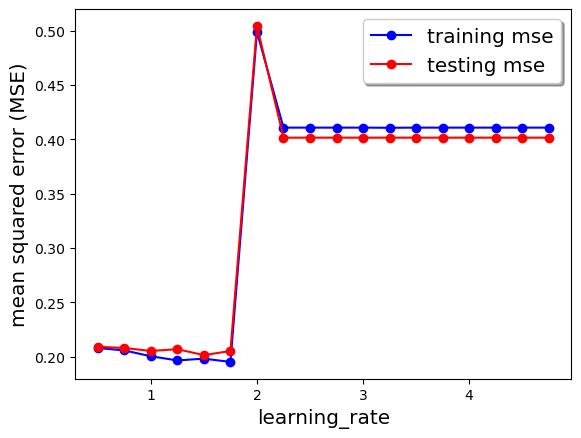

In [28]:
# Parameter tuning - learning_rate
learning_rate_range = np.arange(0.5, 5, 0.25)

lr_ab_train_mse = []
lr_ab_test_mse = []

for l in learning_rate_range:
    # Create AdaBoost Classifier Model
    ab = AdaBoostClassifier(learning_rate=l,random_state=42, n_estimators=200)
    ab.fit(x_train, y_train) 
    lr_ab_train_mse.append(mean_squared_error(ab.predict(x_train), y_train))
    lr_ab_test_mse.append(mean_squared_error(ab.predict(x_test), y_test))
    
plot_param('learning_rate', learning_rate_range, lr_ab_train_mse, lr_ab_test_mse)

>>##### 1.4.3.3 Parameter Tuning for 'n_estimators'

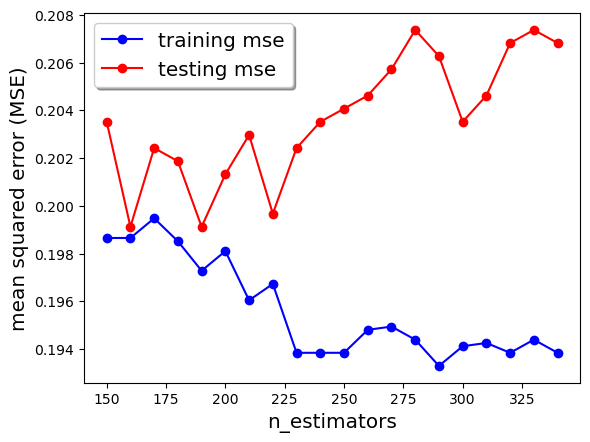

In [29]:
# Parameter tuning - n_estimators
estimators_range = range(150, 350, 10)

e_ab_train_mse = []
e_ab_test_mse = []

for e in estimators_range:
    # Create AdaBoost Classifier Model
    ab = AdaBoostClassifier(learning_rate=1.5,random_state=42, n_estimators=e)
    ab.fit(x_train, y_train) 
    e_ab_train_mse.append(mean_squared_error(ab.predict(x_train), y_train))
    e_ab_test_mse.append(mean_squared_error(ab.predict(x_test), y_test))
    
plot_param('n_estimators', estimators_range, e_ab_train_mse, e_ab_test_mse)

>>##### 1.4.3.4 Final AdaBoost Classifier Model

training accuracy is:  0.80134726422876
testing accuracy is:  0.8008800880088008


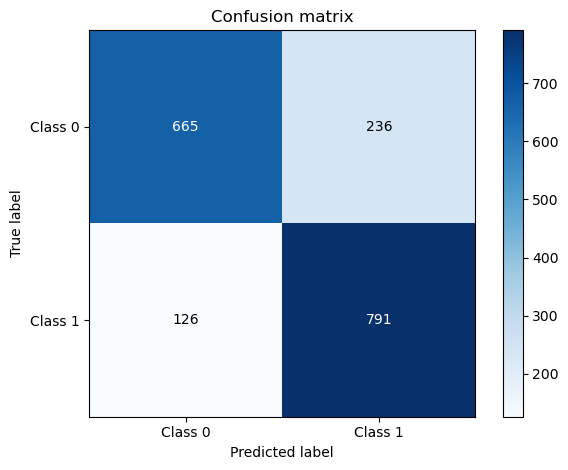

In [30]:
# Final AdaBoost model after tuning
ab_new = AdaBoostClassifier(learning_rate=1.5,random_state=42, n_estimators=160)
ab_new.fit(x_train,y_train)
evaluate_model(ab_new, x_train, y_train, x_test, y_test)

### 1.5 Select Best Model

In [35]:
# Evaluate models
models = ['Random Forest', 'XGBoost', 'AdaBoost']
models1 = [rf_new, xgb_new, ab_new]
train_accuracy = []
test_accuracy = []
f1_scores = []
true_negatives = []
false_positives = []
false_negatives = []
true_positives = []

# Append to lists
for m in models1:
    train_accuracy.append(m.score(x_train, y_train)),
    test_accuracy.append(m.score(x_test, y_test)),
    y_pred = m.predict(x_test)
    f1_scores.append(f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    true_negatives.append(cm[0][0]),
    false_positives.append(cm[0][1]),
    false_negatives.append(cm[1][0]),
    true_positives.append(cm[1][1])
    
# Create a dictionary to store metrics
metrics_dict = {
    'Model': models,
    'Train Accuracy': train_accuracy,
    'Test Accuracy' : test_accuracy,
    'F1 Score' : f1_scores,
    'True Negatives' : true_negatives,
    'False Positives' : false_positives,
    'False Negatives' : false_negatives,
    'True Positives' : true_positives
}

# Convert the dictionary to a Pandas DataFrame
class_df = pd.DataFrame(metrics_dict)

# Display data
class_df

,Model,Train Accuracy,Test Accuracy,F1 Score,True Negatives,False Positives,False Negatives,True Positives
0,Random Forest,0.829255,0.823982,0.842053,645,256,64,853
1,XGBoost,0.826505,0.825633,0.842367,654,247,70,847
2,AdaBoost,0.802722,0.800880,0.814739,660,241,121,796


## 2. Airbnb

### 2.1 Load and Sample the data

In [31]:
# Load data
cr_df = pd.read_csv("listings_new.csv")

In [32]:
# Display first five rows of cr_df
cr_df.head()

,Unnamed: 0,host_id,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,neighbourhood^2 availability_365,neighbourhood^2 number_of_reviews,neighbourhood availability_365^2,neighbourhood availability_365 number_of_reviews,neighbourhood number_of_reviews^2,availability_365^3,availability_365^2 number_of_reviews,availability_365 number_of_reviews^2,number_of_reviews^3,price
0,0,189326474,0.164552,-0.027906,0.408358,1.184431,-1.133896,-1.022677,-0.234643,-0.337913,...,-0.009150,-0.030703,0.018789,0.063049,0.211568,-0.038585,-0.129474,-0.434461,-1.457874,387.0
1,1,29420853,0.090008,1.417340,-0.101419,1.089011,-0.386339,-0.789903,1.358520,1.042284,...,0.008444,-0.003130,0.097781,-0.036244,0.013434,1.132291,-0.419702,0.155569,-0.057664,131.0
2,2,78386666,0.160785,0.503189,1.528255,-0.543271,-0.386339,-0.789903,-0.530524,-1.502018,...,-0.038830,-0.009988,0.362740,0.093302,0.023998,-3.388638,-0.871604,-0.224188,-0.057664,49.0
3,3,108773366,0.164552,0.384140,0.426895,-1.233383,-1.133896,-1.022677,1.205505,-0.358825,...,-0.009716,-0.030703,0.021187,0.066951,0.211568,-0.046201,-0.145995,-0.461348,-1.457874,210.0
4,4,31464513,0.090008,1.477173,-0.027270,1.383028,-1.133896,-1.022677,1.232236,1.042284,...,0.008444,-0.009186,0.097781,-0.106375,0.115725,1.132291,-1.231815,1.340086,-1.457874,181.0


In [33]:
# Info of cr_df
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6305 entries, 0 to 6304
Data columns (total 45 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Unnamed: 0                                                         6305 non-null   int64  
 1   host_id                                                            6305 non-null   int64  
 2   neighbourhood                                                      6305 non-null   float64
 3   latitude                                                           6305 non-null   float64
 4   longitude                                                          6305 non-null   float64
 5   minimum_nights                                                     6305 non-null   float64
 6   number_of_reviews                                                  6305 non-null   float64
 7   reviews_per_month       

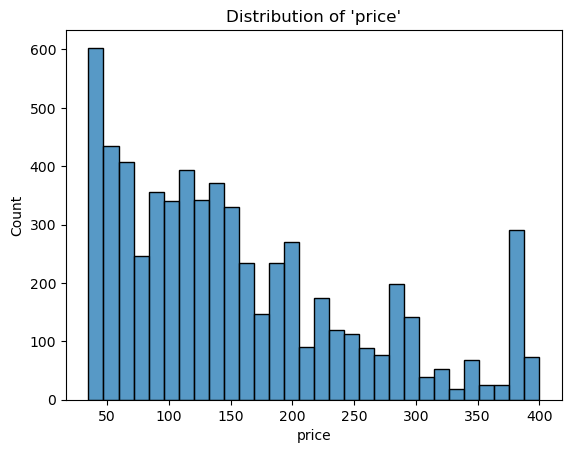

In [34]:
# Distribution of 'price'
sns.histplot(cr_df['price'], bins=30)
plt.title("Distribution of 'price'")

plt.show()

In [35]:
# Split into train and test
cr_df_x = cr_df.copy()
cr_df_x.drop(['Unnamed: 0', 'price'], axis=1, inplace = True)
cr_df_y = cr_df['price']
x_train, x_test, y_train, y_test = cr_df_x.iloc[:5045, :], cr_df_x.iloc[5045:, :], cr_df_y[:5045], cr_df_y[5045:]

### 2.2 Build the Model(s)

In [42]:
# Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [43]:
# XGBoost Regressor
xgr = XGBRegressor(random_state=42)
xgr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [44]:
# AdaBoost Regressor
abr = AdaBoostRegressor(random_state=42)
abr.fit(x_train,y_train)

AdaBoostRegressor(random_state=42)

### 2.3 Evaluate the Model(s)

In [36]:
# Evaluate regressor models
def eval_regressor(model, X, Y, x, y):
    # Make predictions on the training set
    y_train_pred = model.predict(X)

    # Make predictions on the test set
    y_test_pred = model.predict(x)

    # Calculate Mean Absolute Error (MAE) for train and test
    mae_train = mean_absolute_error(Y, y_train_pred)
    mae_test = mean_absolute_error(y, y_test_pred)

    # Calculate Root Mean Squared Error (RMSE) for train and test
    rmse_train = np.sqrt(mean_squared_error(Y, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y, y_test_pred))

    # Calculate R-squared (R2) for train and test
    r2_train = r2_score(Y, y_train_pred)
    r2_test = r2_score(y, y_test_pred)

    # Display the metrics
    print("Train set:")
    print("Mean Absolute Error (MAE):", mae_train)
    print("Root Mean Squared Error (RMSE):", rmse_train)
    print("R-squared (R2):", r2_train)
    print("\nTest set:")
    print("Mean Absolute Error (MAE):", mae_test)
    print("Root Mean Squared Error (RMSE):", rmse_test)
    print("R-squared (R2):", r2_test)

>#### 2.3.1 Random Forest Regressor
>- Low MAE -> low average absolute difference between the predicted values and the actual values in the training set
>- High R^2 -> explains large proportion of variability in train
>- Large differences between train and test in all three metrics
>- Model is overfitted

In [47]:
# Random Forest Regressor
eval_regressor(rfr, x_train, y_train, x_test, y_test)

Train set:
Mean Absolute Error (MAE): 15.00845986124876
Root Mean Squared Error (RMSE): 22.503277842507437
R-squared (R2): 0.9466474130910366

Test set:
Mean Absolute Error (MAE): 40.970325396825395
Root Mean Squared Error (RMSE): 60.32654392935433
R-squared (R2): 0.6411859021390531


>#### 2.3.2 XGBoost Regressor
>- Low MAE, slightly lower than Random Forest -> lower average absolute difference between the predicted values and the actual values in the training set
>- High R^2, slightly higher than Random Forest -> explains larger proportion of variability in train
>- Large differences between train and test in all three metrics
>- Model is overfitted

In [48]:
# XGBoost Regressor
eval_regressor(xgr, x_train, y_train, x_test, y_test)

Train set:
Mean Absolute Error (MAE): 14.954223684229628
Root Mean Squared Error (RMSE): 21.116207904355633
R-squared (R2): 0.9530218645418244

Test set:
Mean Absolute Error (MAE): 43.83583551550668
Root Mean Squared Error (RMSE): 64.26836008756236
R-squared (R2): 0.5927631741799448


>#### 2.3.3 AdaBoost Regressor
>- Significantly higher MAE than Random Forest and XGBoost -> higher average absolute difference between predicted values and actual values in training set
>- Significantly lower R^2 than Random Forest and XGBoost -> explains smaller proportion of variability in train
>- Smaller differences between train and test in all three metrics
>- Model is not as overfitted as Random Forest and XGBoost

In [49]:
# AdaBoost Regressor
eval_regressor(abr, x_train, y_train, x_test, y_test)

Train set:
Mean Absolute Error (MAE): 72.52238177244122
Root Mean Squared Error (RMSE): 84.6491029044378
R-squared (R2): 0.24506660514367296

Test set:
Mean Absolute Error (MAE): 75.21058810316325
Root Mean Squared Error (RMSE): 88.21464577588772
R-squared (R2): 0.23275512489738204


### 2.4 Improve the Model(s)
>#### 2.4.1 Random Forest Regressor
>>##### 2.4.1.1 GridSearch
>>Parameters tuned for Random Forest:
>>- n_estimators
>>- max_depth
>>- min_samples_split
>>- min_samples_leaf
>>- max_features

In [50]:
# GridSearch for Random Forest Regressor
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when looking for the best split
}

# Create a Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
rfr_gs = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search on the training data
rfr_gs.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", rfr_gs.best_params_)

# Get the best Random Forest Regressor model
best_rfr = rfr_gs.best_estimator_

# Make predictions on the test set
y_pred = best_rfr.predict(x_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Best Parameters: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Root Mean Squared Error: 67.07053281009836
R-squared Score: 0.5564770268660097


>>##### 2.4.1.2 Parameter Tuning for 'max_depth'

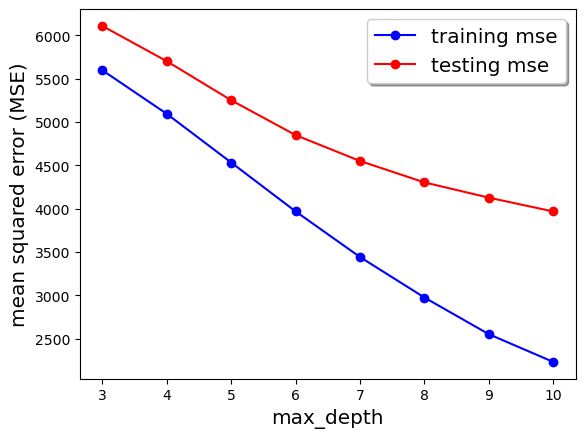

In [51]:
# Parameter tuning - max_depth
max_depth_range = range(3,11)

md_rfr_train_mse = []
md_rfr_test_mse = []

for m in max_depth_range:
    # Create Random Forest Regressor Model
    rfr = RandomForestRegressor(max_depth=m, max_features=0.8, min_samples_leaf=4, min_samples_split=2, n_estimators=100, 
                                random_state=42)
    rfr.fit(x_train, y_train) 
    md_rfr_train_mse.append(mean_squared_error(rfr.predict(x_train), y_train))
    md_rfr_test_mse.append(mean_squared_error(rfr.predict(x_test), y_test))
    
plot_param('max_depth', max_depth_range, md_rfr_train_mse, md_rfr_test_mse)

>>##### 2.4.1.3 Parameter Tuning for 'n_estimators'

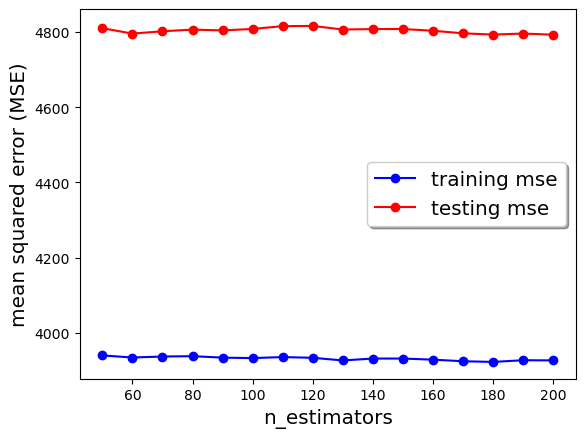

In [53]:
# Parameter tuning - n_estimators
estimators_range = range(50, 210, 10)

e_rfr_train_mse = []
e_rfr_test_mse = []

for e in estimators_range:
    # Create Random Forest Regressor Model
    rfr = RandomForestRegressor(max_depth=6, max_features='auto', min_samples_leaf=4, min_samples_split=2, n_estimators=e,
                               random_state=42)
    rfr.fit(x_train, y_train) 
    e_rfr_train_mse.append(mean_squared_error(rfr.predict(x_train), y_train))
    e_rfr_test_mse.append(mean_squared_error(rfr.predict(x_test), y_test))
    
plot_param('n_estimators', estimators_range, e_rfr_train_mse, e_rfr_test_mse)

>>##### 2.4.1.4 Parameter Tuning for 'min_samples_leaf'

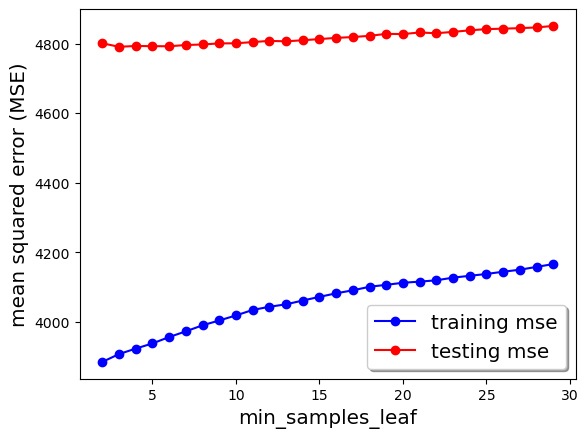

In [40]:
# Parameter tuning - min_samples_leaf
min_samples_leaf_range = range(2, 30)

msl_rfr_train_mse = []
msl_rfr_test_mse = []

for m in min_samples_leaf_range:
    # Create Random Forest Regressor Model
    rfr = RandomForestRegressor(max_depth=6, max_features='auto', min_samples_leaf=m, min_samples_split=2, n_estimators=180,
                               random_state=42)
    rfr.fit(x_train, y_train) 
    msl_rfr_train_mse.append(mean_squared_error(rfr.predict(x_train), y_train))
    msl_rfr_test_mse.append(mean_squared_error(rfr.predict(x_test), y_test))
    
plot_param('min_samples_leaf', min_samples_leaf_range, msl_rfr_train_mse, msl_rfr_test_mse)

>>##### 2.4.1.6 Parameter Tuning for 'min_samples_split'

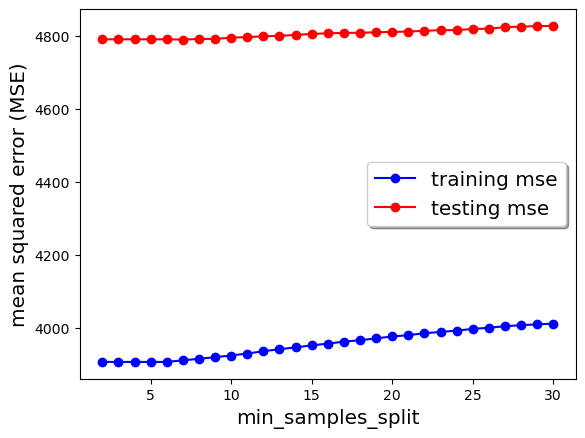

In [43]:
# Parameter tuning - min_samples_split
min_samples_split_range = range(2, 31)

mss_rfr_train_mse = []
mss_rfr_test_mse = []

for m in min_samples_split_range:
    # Create Random Forest Regressor Model
    rfr = RandomForestRegressor(max_depth=6, max_features='auto', min_samples_leaf=3, min_samples_split=m, n_estimators=180,
                               random_state=42)
    rfr.fit(x_train, y_train) 
    mss_rfr_train_mse.append(mean_squared_error(rfr.predict(x_train), y_train))
    mss_rfr_test_mse.append(mean_squared_error(rfr.predict(x_test), y_test))
    
plot_param('min_samples_split', min_samples_split_range, mss_rfr_train_mse, mss_rfr_test_mse)

>>##### 2.4.1.7 Model with Best Parameters

In [44]:
# New model for Random Forest Regressor
rfr_new = RandomForestRegressor(max_depth=6, max_features='auto', min_samples_leaf=3, min_samples_split=6, n_estimators=180, 
                                random_state=42)
rfr_new.fit(x_train, y_train) 
eval_regressor(rfr_new, x_train, y_train, x_test, y_test)

Train set:
Mean Absolute Error (MAE): 45.658325202999144
Root Mean Squared Error (RMSE): 62.50707832891755
R-squared (R2): 0.5883555002557725

Test set:
Mean Absolute Error (MAE): 49.84261122657446
Root Mean Squared Error (RMSE): 69.21470072551632
R-squared (R2): 0.5276659027825144


>>##### 2.4.1.8 Feature Importances

In [45]:
rfr_feature_importance_df = pd.concat((pd.DataFrame(x_train.columns, columns = ['feature']), 
           pd.DataFrame(rfr_new.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)
rfr_feature_importance_df

,feature,importance
11,room_type_Entire home/apt,0.559649
0,host_id,0.058950
4,minimum_nights,0.051535
34,neighbourhood^2 availability_365,0.047860
2,latitude,0.044154
12,room_type_Private room,0.024573
3,longitude,0.020945
28,calculated_host_listings_count neighbourhood a...,0.016900
15,calculated_host_listings_count availability_365,0.014432
18,neighbourhood availability_365,0.013232


In [46]:
for f in range(20, 41):
    # Select the top n features
    top_features = rfr_feature_importance_df.head(f)

    # Get the names of the top n features
    top_feature_names = top_features['feature'].tolist()

    # Get feature names
    feature_names = x_train.columns

    # Get index of top n features
    top_features_indices = [feature_names.tolist().index(feature_name) for feature_name in top_feature_names]

    # Select the top n features from the training and testing sets
    x_train_selected = x_train.iloc[:, top_features_indices]
    x_test_selected = x_test.iloc[:, top_features_indices]

    # Fit model into new train
    rfr_new.fit(x_train_selected, y_train)
    print('\n\nNumber of features:', str(f))
    eval_regressor(rfr_new, x_train_selected, y_train, x_test_selected, y_test)



Number of features: 20
Train set:
Mean Absolute Error (MAE): 45.665636576791854
Root Mean Squared Error (RMSE): 62.725136002531116
R-squared (R2): 0.585478424141921

Test set:
Mean Absolute Error (MAE): 49.659869694162225
Root Mean Squared Error (RMSE): 69.1514838176397
R-squared (R2): 0.5285283168299177


Number of features: 21
Train set:
Mean Absolute Error (MAE): 45.65216565567695
Root Mean Squared Error (RMSE): 62.67999309137237
R-squared (R2): 0.586074866912734

Test set:
Mean Absolute Error (MAE): 49.68470607641031
Root Mean Squared Error (RMSE): 69.11188585320764
R-squared (R2): 0.529068116488238


Number of features: 22
Train set:
Mean Absolute Error (MAE): 45.65105466021045
Root Mean Squared Error (RMSE): 62.680923631009286
R-squared (R2): 0.586062576656045

Test set:
Mean Absolute Error (MAE): 49.687537991811524
Root Mean Squared Error (RMSE): 69.12737601829171
R-squared (R2): 0.528856991295276


Number of features: 23
Train set:
Mean Absolute Error (MAE): 45.70015742915131

>>##### 2.4.1.9 Final Random Forest Regressor Model

In [47]:
# Final Random Forest Regressor model
# Select the top 21 features
top_21_features = rfr_feature_importance_df.head(21)

# Get the names of the top 21 features
top_21_feature_names = top_21_features['feature'].tolist()

# Get feature names
feature_names = x_train.columns

# Get index of top 21 features
top_21_features_indices = [feature_names.tolist().index(feature_name) for feature_name in top_21_feature_names]

# Select the top 21 features from the training and testing sets
x_train_selected_rfr = x_train.iloc[:, top_21_features_indices]
x_test_selected_rfr = x_test.iloc[:, top_21_features_indices]

# Fit model into new train
rfr_new.fit(x_train_selected_rfr, y_train)
eval_regressor(rfr_new, x_train_selected_rfr, y_train, x_test_selected_rfr, y_test)

Train set:
Mean Absolute Error (MAE): 45.65216565567695
Root Mean Squared Error (RMSE): 62.67999309137237
R-squared (R2): 0.586074866912734

Test set:
Mean Absolute Error (MAE): 49.68470607641031
Root Mean Squared Error (RMSE): 69.11188585320764
R-squared (R2): 0.529068116488238


>#### 2.4.2 XGBoost Regressor
>>##### 2.4.2.1 GridSearch & Regularization
>>Parameters tuned for XGBoost:
>>- n_estimators
>>- max_depth
>>- learning_rate
>>- alpha (regularization parameter)
>>- lambda (regularization parameter)

In [60]:
# GridSearch for XGBoost Regressor + regularization
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'alpha': [0.1, 0.01, 0.001],  # L1 regularization
    'lambda': [0.1, 0.01, 0.001],  # L2 regularization
}

# Create an XGBoost regressor
xgr = XGBRegressor(random_state=42)

# Instantiate GridSearchCV
xgr_gs = GridSearchCV(xgr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search on the training data
xgr_gs.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", xgr_gs.best_params_)

# Get the best XGBoost model
best_xgr = xgr_gs.best_estimator_

# Make predictions on the test set
y_pred = best_xgr.predict(x_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Best Parameters: {'alpha': 0.1, 'lambda': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Root Mean Squared Error: 62.82336959058185
R^2 Score: 0.6108696899977027


>>##### 2.4.2.1 Parameter Tuning for 'n_estimators'

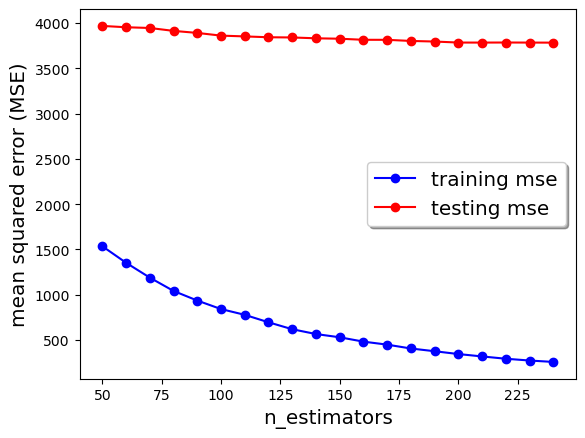

In [61]:
# Parameter tuning - n_estimators
estimators_range = range(50, 250, 10)

e_xgr_train_mse = []
e_xgr_test_mse = []

for e in estimators_range:
    # Create XGBoost Regressor Model
    xgr = XGBRegressor(learning_rate=0.1,random_state=42, n_estimators=e, reg_alpha=0.1, reg_lambda=0.1, max_depth=7)
    xgr.fit(x_train, y_train) 
    e_xgr_train_mse.append(mean_squared_error(xgr.predict(x_train), y_train))
    e_xgr_test_mse.append(mean_squared_error(xgr.predict(x_test), y_test))
    
plot_param('n_estimators', estimators_range, e_xgr_train_mse, e_xgr_test_mse)

>>##### 2.4.2.2 Parameter Tuning for 'learning_rate'

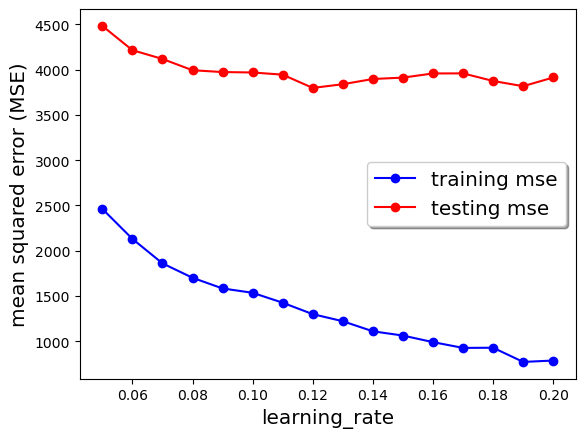

In [62]:
# Parameter tuning - learning_rate
learning_rate_range = np.arange(0.05, 0.2, 0.01)

lr_xgr_train_mse = []
lr_xgr_test_mse = []

for l in learning_rate_range:
    # Create XGBoost Regressor Model
    xgr = XGBRegressor(learning_rate=l,random_state=42, n_estimators=50, reg_alpha=0.1, reg_lambda=0.1, max_depth=7)
    xgr.fit(x_train, y_train) 
    lr_xgr_train_mse.append(mean_squared_error(xgr.predict(x_train), y_train))
    lr_xgr_test_mse.append(mean_squared_error(xgr.predict(x_test), y_test))
    
plot_param('learning_rate', learning_rate_range, lr_xgr_train_mse, lr_xgr_test_mse)

>>##### 2.4.2.3 Parameter Tuning for 'max_depth'

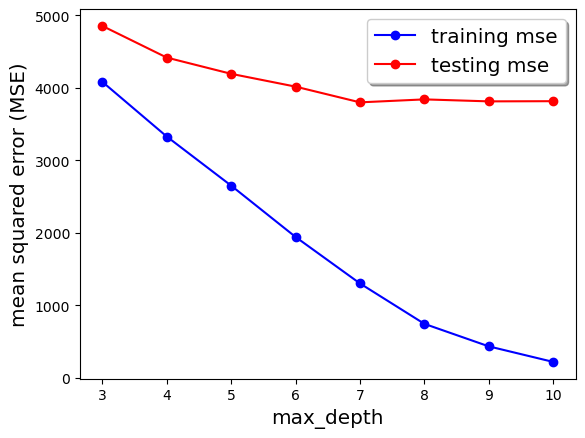

In [63]:
# Parameter tuning - max_depth
max_depth_range = range(3,11)

md_xgr_train_mse = []
md_xgr_test_mse = []

for m in max_depth_range:
    # Create XGBoost Regressor Model
    xgr = XGBRegressor(learning_rate=0.12,random_state=42, n_estimators=50, reg_alpha=0.1, reg_lambda=0.1, max_depth=m)
    xgr.fit(x_train, y_train) 
    md_xgr_train_mse.append(mean_squared_error(xgr.predict(x_train), y_train))
    md_xgr_test_mse.append(mean_squared_error(xgr.predict(x_test), y_test))
    
plot_param('max_depth', max_depth_range, md_xgr_train_mse, md_xgr_test_mse)

>>##### 2.4.2.4 Parameter Tuning for 'alpha'

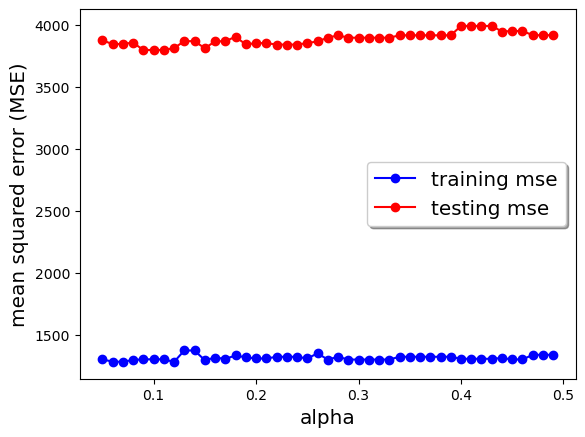

In [48]:
# Parameter tuning - alpha
alpha_range = np.arange(0.05, 0.5, 0.01)

a_xgr_train_mse = []
a_xgr_test_mse = []

for a in alpha_range:
    # Create XGBoost Regressor Model
    xgr = XGBRegressor(learning_rate=0.12,random_state=42, n_estimators=50, reg_alpha=a, reg_lambda=0.1, max_depth=7)
    xgr.fit(x_train, y_train) 
    a_xgr_train_mse.append(mean_squared_error(xgr.predict(x_train), y_train))
    a_xgr_test_mse.append(mean_squared_error(xgr.predict(x_test), y_test))
    
plot_param('alpha', alpha_range, a_xgr_train_mse, a_xgr_test_mse)

>>##### 2.4.2.5 Parameter Tuning for 'lambda'

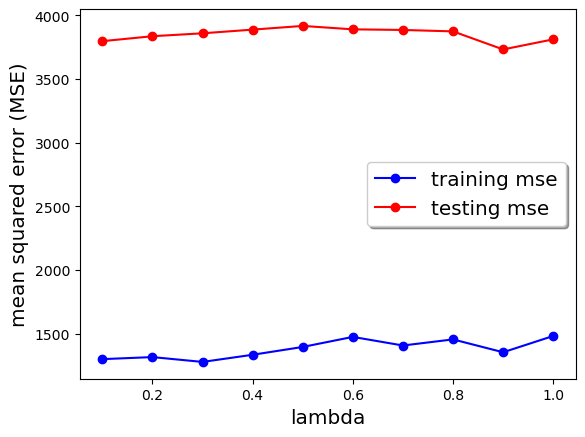

In [65]:
# Parameter tuning - lambda
lambda_range = np.arange(0.1, 1.1, 0.1)

l_xgr_train_mse = []
l_xgr_test_mse = []

for l in lambda_range:
    # Create XGBoost Regressor Model
    xgr = XGBRegressor(learning_rate=0.12,random_state=42, n_estimators=50, reg_alpha=0.1, reg_lambda=l, max_depth=7)
    xgr.fit(x_train, y_train) 
    l_xgr_train_mse.append(mean_squared_error(xgr.predict(x_train), y_train))
    l_xgr_test_mse.append(mean_squared_error(xgr.predict(x_test), y_test))
    
plot_param('lambda', lambda_range, l_xgr_train_mse, l_xgr_test_mse)

>>##### 2.4.2.6 Parameter Tuning for 'subsample'

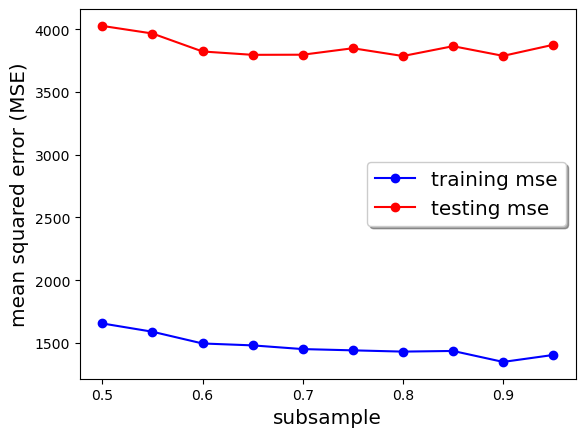

In [49]:
# Parameter tuning - subsample
subsample_range = np.arange(0.5, 1, 0.05)

s_xgr_train_mse = []
s_xgr_test_mse = []

for s in subsample_range:
    # Create XGBoost Regressor Model
    xgr = XGBRegressor(learning_rate=0.12,random_state=42, n_estimators=50, reg_alpha=0.1, reg_lambda=0.9, max_depth=7,
                       subsample=s)
    xgr.fit(x_train, y_train) 
    s_xgr_train_mse.append(mean_squared_error(xgr.predict(x_train), y_train))
    s_xgr_test_mse.append(mean_squared_error(xgr.predict(x_test), y_test))
    
plot_param('subsample', subsample_range, s_xgr_train_mse, s_xgr_test_mse)

>>##### 2.4.2.7 Model with Best Parameters

In [52]:
# Best parameters for XGBoost
xgr_new = XGBRegressor(learning_rate=0.12,random_state=42, n_estimators=50, reg_alpha=0.1, reg_lambda=0.9, max_depth=3, 
                       subsample = 0.7)
xgr_new.fit(x_train, y_train) 
eval_regressor(xgr_new, x_train, y_train, x_test, y_test)

Train set:
Mean Absolute Error (MAE): 47.05863287011743
Root Mean Squared Error (RMSE): 63.64476456257949
R-squared (R2): 0.5732345174497255

Test set:
Mean Absolute Error (MAE): 50.473277848864356
Root Mean Squared Error (RMSE): 69.12158201527996
R-squared (R2): 0.5289359669419027


>>##### 2.4.2.8 Feature Importances

In [54]:
feature_importance_df = pd.concat((pd.DataFrame(x_train.columns, columns = ['feature']), 
           pd.DataFrame(xgr_new.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)
feature_importance_df

,feature,importance
11,room_type_Entire home/apt,0.362699
34,neighbourhood^2 availability_365,0.063971
12,room_type_Private room,0.034999
27,calculated_host_listings_count neighbourhood^2,0.030492
32,calculated_host_listings_count number_of_revie...,0.028798
5,number_of_reviews,0.027615
28,calculated_host_listings_count neighbourhood a...,0.027033
0,host_id,0.025902
4,minimum_nights,0.025365
31,calculated_host_listings_count availability_36...,0.024201


In [69]:
for f in range(20, 41):
    # Select the top n features
    top_features = feature_importance_df.head(f)

    # Get the names of the top n features
    top_feature_names = top_features['feature'].tolist()

    # Get feature names
    feature_names = x_train.columns

    # Get index of top n features
    top_features_indices = [feature_names.tolist().index(feature_name) for feature_name in top_feature_names]

    # Select the top n features from the training and testing sets
    x_train_selected = x_train.iloc[:, top_features_indices]
    x_test_selected = x_test.iloc[:, top_features_indices]

    # Fit model into new train
    xgr_new.fit(x_train_selected, y_train)
    print('\n\nNumber of features:', str(f))
    eval_regressor(xgr_new, x_train_selected, y_train, x_test_selected, y_test)



Number of features: 20
Train set:
Mean Absolute Error (MAE): 47.61968759512169
Root Mean Squared Error (RMSE): 64.27839216246498
R-squared (R2): 0.5646947278408159

Test set:
Mean Absolute Error (MAE): 50.594763937450594
Root Mean Squared Error (RMSE): 69.39951328144748
R-squared (R2): 0.5251401441436856


Number of features: 21
Train set:
Mean Absolute Error (MAE): 47.61968759512169
Root Mean Squared Error (RMSE): 64.27839216246498
R-squared (R2): 0.5646947278408159

Test set:
Mean Absolute Error (MAE): 50.594763937450594
Root Mean Squared Error (RMSE): 69.39951328144748
R-squared (R2): 0.5251401441436856


Number of features: 22
Train set:
Mean Absolute Error (MAE): 47.547194324943305
Root Mean Squared Error (RMSE): 64.20595828253401
R-squared (R2): 0.5656752465828887

Test set:
Mean Absolute Error (MAE): 50.41658384232294
Root Mean Squared Error (RMSE): 69.2571258961898
R-squared (R2): 0.5270866906819027


Number of features: 23
Train set:
Mean Absolute Error (MAE): 47.30366083528

>>##### 2.4.2.9 Final XGBoost Regressor Model

In [55]:
# Final score of XGBoost Regressor
# Select the top 28 features
top_28_features = feature_importance_df.head(28)

# Get the names of the top 28 features
top_28_feature_names = top_28_features['feature'].tolist()

# Get feature names
feature_names = x_train.columns

# Get index of top 28 features
top_28_features_indices = [feature_names.tolist().index(feature_name) for feature_name in top_28_feature_names]

# Select the top 28 features from the training and testing sets
x_train_selected_xgr = x_train.iloc[:, top_28_features_indices]
x_test_selected_xgr = x_test.iloc[:, top_28_features_indices]

# Fit model into new train
xgr_new.fit(x_train_selected_xgr, y_train)
eval_regressor(xgr_new, x_train_selected_xgr, y_train, x_test_selected_xgr, y_test)

Train set:
Mean Absolute Error (MAE): 47.065862814805904
Root Mean Squared Error (RMSE): 63.58280840043179
R-squared (R2): 0.5740649983856075

Test set:
Mean Absolute Error (MAE): 50.238001369294665
Root Mean Squared Error (RMSE): 69.1158222916247
R-squared (R2): 0.5290144687797749


>#### 2.4.3 AdaBoost Regressor
>>##### 2.4.3.1 GridSearch
>>Parameters tuned for AdaBoost:
>>- learning_rate
>>- n_estimators
>>- base_estimator

In [71]:
# Gridsearch for AdaBoost Regressor
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'base_estimator': [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=5)] 
}

# Create an AdaBoost Regressor
abr = AdaBoostRegressor(random_state=42)

# Instantiate GridSearchCV
abr_gs = GridSearchCV(estimator=abr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search on the training data
abr_gs.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", abr_gs.best_params_)

# Get the best AdaBoost Regressor model
best_abr = abr_gs.best_estimator_

# Make predictions on the test set
y_pred = best_abr.predict(x_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Best Parameters: {'base_estimator': DecisionTreeRegressor(max_depth=5), 'learning_rate': 0.1, 'n_estimators': 50}
Root Mean Squared Error: 72.26714512898137
R-squared Score: 0.48508635086538254


>>##### 2.4.3.2 Parameter Tuning for 'learning_rate'

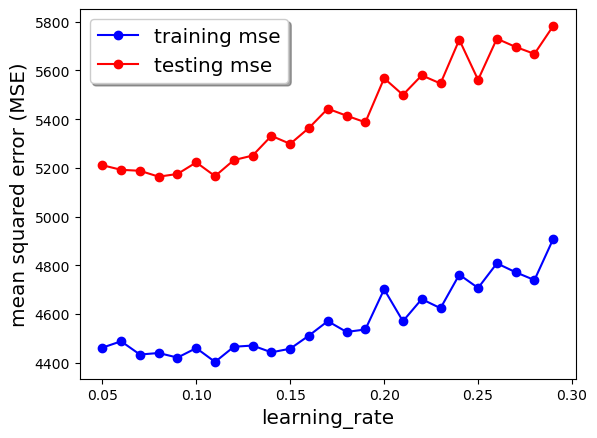

In [72]:
# Parameter tuning - learning_rate
learning_rate_range = np.arange(0.05, 0.3, 0.01)

lr_abr_train_mse = []
lr_abr_test_mse = []

for l in learning_rate_range:
    # Create AdaBoost Regressor Model
    abr = AdaBoostRegressor(learning_rate=l,random_state=42, n_estimators=50, base_estimator=DecisionTreeRegressor(max_depth=5))
    abr.fit(x_train, y_train) 
    lr_abr_train_mse.append(mean_squared_error(abr.predict(x_train), y_train))
    lr_abr_test_mse.append(mean_squared_error(abr.predict(x_test), y_test))
    
plot_param('learning_rate', learning_rate_range, lr_abr_train_mse, lr_abr_test_mse)

>>##### 2.4.3.3 Parameter Tuning for 'n_estimators'

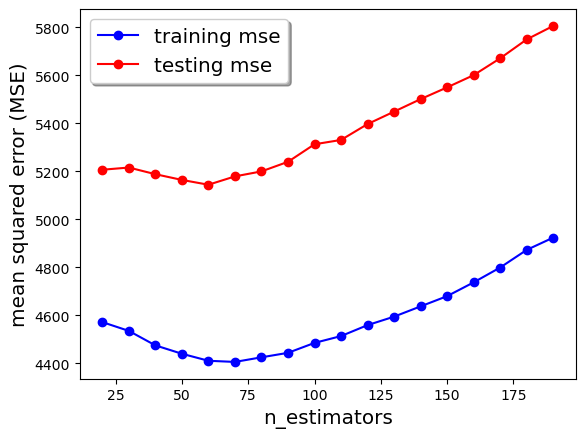

In [73]:
# Parameter tuning - n_estimators
estimators_range = range(20, 200, 10)

e_abr_train_mse = []
e_abr_test_mse = []

for e in estimators_range:
    # Create Adaboost Regressor Model
    abr = AdaBoostRegressor(learning_rate=0.08,random_state=42,n_estimators=e,base_estimator=DecisionTreeRegressor(max_depth=5))
    abr.fit(x_train, y_train) 
    e_abr_train_mse.append(mean_squared_error(abr.predict(x_train), y_train))
    e_abr_test_mse.append(mean_squared_error(abr.predict(x_test), y_test))
    
plot_param('n_estimators', estimators_range, e_abr_train_mse, e_abr_test_mse)

>>##### 2.4.3.4 Model with Best Parameters

In [74]:
# Best parameters for AdaBoost
abr_new = AdaBoostRegressor(random_state=42, base_estimator=DecisionTreeRegressor(max_depth=5), learning_rate=0.08,
                           n_estimators=60)
abr_new.fit(x_train, y_train)
eval_regressor(abr_new, x_train, y_train, x_test, y_test)

Train set:
Mean Absolute Error (MAE): 52.03164063781686
Root Mean Squared Error (RMSE): 66.4133998710753
R-squared (R2): 0.5352971412902747

Test set:
Mean Absolute Error (MAE): 55.316919037127924
Root Mean Squared Error (RMSE): 71.72145322330573
R-squared (R2): 0.4928332557371191


>>##### 2.4.3.5 Feature Importances

In [75]:
abr_feature_importance_df = pd.concat((pd.DataFrame(x_train.columns, columns = ['feature']), 
           pd.DataFrame(abr_new.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)
abr_feature_importance_df

,feature,importance
11,room_type_Entire home/apt,0.415970
4,minimum_nights,0.065860
2,latitude,0.050190
0,host_id,0.043093
3,longitude,0.038351
12,room_type_Private room,0.034118
34,neighbourhood^2 availability_365,0.032366
27,calculated_host_listings_count neighbourhood^2,0.025751
29,calculated_host_listings_count neighbourhood n...,0.022540
15,calculated_host_listings_count availability_365,0.021687


In [76]:
for f in range(20, 41):
    # Select the top n features
    top_features = abr_feature_importance_df.head(f)

    # Get the names of the top n features
    top_feature_names = top_features['feature'].tolist()

    # Get feature names
    feature_names = x_train.columns

    # Get index of top n features
    top_features_indices = [feature_names.tolist().index(feature_name) for feature_name in top_feature_names]

    # Select the top n features from the training and testing sets
    x_train_selected = x_train.iloc[:, top_features_indices]
    x_test_selected = x_test.iloc[:, top_features_indices]

    # Fit model into new train
    abr_new.fit(x_train_selected, y_train)
    print('\n\nNumber of features:', str(f))
    eval_regressor(abr_new, x_train_selected, y_train, x_test_selected, y_test)



Number of features: 20
Train set:
Mean Absolute Error (MAE): 52.443981625039854
Root Mean Squared Error (RMSE): 66.7995765026084
R-squared (R2): 0.5298771768259527

Test set:
Mean Absolute Error (MAE): 55.515723910873156
Root Mean Squared Error (RMSE): 71.91409422225875
R-squared (R2): 0.4901051370357149


Number of features: 21
Train set:
Mean Absolute Error (MAE): 52.66314672074176
Root Mean Squared Error (RMSE): 66.79152955894241
R-squared (R2): 0.529990435747984

Test set:
Mean Absolute Error (MAE): 55.968848137597305
Root Mean Squared Error (RMSE): 72.14014061384401
R-squared (R2): 0.4868946108551281


Number of features: 22
Train set:
Mean Absolute Error (MAE): 52.02942237759866
Root Mean Squared Error (RMSE): 66.33129683317347
R-squared (R2): 0.536445401521041

Test set:
Mean Absolute Error (MAE): 55.54255969713689
Root Mean Squared Error (RMSE): 71.82171575685355
R-squared (R2): 0.4914142837834954


Number of features: 23
Train set:
Mean Absolute Error (MAE): 52.2309579034440

>>##### 2.4.3.6 Final AdaBoost Regressor Model

In [77]:
# Final score of AdaBoost Regressor
# Select the top 23 features
top_23_features = abr_feature_importance_df.head(23)

# Get the names of the top 23 features
top_23_feature_names = top_23_features['feature'].tolist()

# Get feature names
feature_names = x_train.columns

# Get index of top 23 features
top_23_features_indices = [feature_names.tolist().index(feature_name) for feature_name in top_23_feature_names]

# Select the top 23 features from the training and testing sets
x_train_selected_abr = x_train.iloc[:, top_23_features_indices]
x_test_selected_abr = x_test.iloc[:, top_23_features_indices]

# Fit model into new train
abr_new.fit(x_train_selected_abr, y_train)
eval_regressor(abr_new, x_train_selected_abr, y_train, x_test_selected_abr, y_test)

Train set:
Mean Absolute Error (MAE): 52.23095790344409
Root Mean Squared Error (RMSE): 66.47472793251406
R-squared (R2): 0.5344385048079592

Test set:
Mean Absolute Error (MAE): 55.28697185025665
Root Mean Squared Error (RMSE): 71.46428510960506
R-squared (R2): 0.4964637812223971


### 2.5 Select Best Model

In [78]:
# Evaluate models
models = ['Random Forest', 'XGBoost', 'AdaBoost']
train_mae = []
test_mae = []
train_rmse = []
test_rmse = []
train_r2 = []
test_r2 = []

# Append to lists
def append_to_list(model, X, x, Y, y):
    # Make predictions on the training set
    y_train_pred = model.predict(X)

    # Make predictions on the test set
    y_test_pred = model.predict(x)
    
    # Append Mean Absolute Error (MAE) for train and test
    train_mae.append(mean_absolute_error(Y, y_train_pred))
    test_mae.append(mean_absolute_error(y, y_test_pred))

    # Append Root Mean Squared Error (RMSE) for train and test
    train_rmse.append(np.sqrt(mean_squared_error(Y, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y, y_test_pred)))

    # Append R-squared (R2) for train and test
    train_r2.append(r2_score(Y, y_train_pred))
    test_r2.append(r2_score(y, y_test_pred))
    
append_to_list(rfr_new, x_train_selected_rfr, x_test_selected_rfr, y_train, y_test)
append_to_list(xgr_new, x_train_selected_xgr, x_test_selected_xgr, y_train, y_test)
append_to_list(abr_new, x_train_selected_abr, x_test_selected_abr, y_train, y_test)
    
# Create a dictionary to store metrics
reg_metrics_dict = {
    'Model': models,
    'Train MAE': train_mae,
    'Test MAE' : test_mae,
    'Train RMSE': train_rmse,
    'Test RMSE' : test_rmse,
    'Train R^2': train_r2,
    'Test R^2' : test_r2,
}

# Convert the dictionary to a Pandas DataFrame
reg_df = pd.DataFrame(reg_metrics_dict)

# Display data
reg_df

,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R^2,Test R^2
0,Random Forest,45.626536,49.870359,62.446254,69.231071,0.589156,0.527442
1,XGBoost,47.258943,50.532983,63.759671,69.279358,0.571692,0.526783
2,AdaBoost,52.230958,55.286972,66.474728,71.464285,0.534439,0.496464
